## Kombinované namáhání

Načtení nutných knihoven

In [2]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

a inicializace sázeného výstupu,

In [3]:
sp.init_printing()

### Př1:

U rámu podle obrázku posuďte bezpečnost vzhledem k meznímu stavu pružnosti, příp. vzpěrné stability, jestliže je dáno,

$\sigma_k=350\,\mathrm{MPa}$

$F=10\,\mathrm{kN}$

$E=2.1\times10^5\,\mathrm{MPa}$

$R=350\,\mathrm{mm}$, $h=50\,\mathrm{mm}$, $b=15\,\mathrm{mm}$

![Obrázek](zakriveny_ram_vzper_.png)

Úloha je $2\times$ staticky neurčitá.

*Úkol*: Proveďte úplné uvolnění a statický rozbor.

Částečné uvolnění lze provést několika způsoby, jedno z nich využívající symetrii úlohy ukazuje výše uvedený obrázek, který je nutné doplnit deformačními podmínkami,

\begin{eqnarray}
  && w_A^I=u_A^{II}\quad\Rightarrow\quad\frac{\partial W^I}{\partial F_{A}}=-\frac{\partial W^{II}}{\partial F_{A}}, \\
  && \varphi_A^I=0\quad\Rightarrow\quad\frac{\partial W^I}{\partial M_{A}}=0,
\end{eqnarray}

kde horní index $I$ odpovídá zakřivenému prutu, horní index $II$ odpovídá přímému prutu.

Zavedení potřebných symbolů,

In [4]:
T,N,M=sp.Function('T'),sp.Function('N'),sp.Function('M')
s,theta=sp.symbols('s theta',real=True)
l=sp.symbols('s')
R=sp.symbols('R',real=True,positive=True)
p,q=sp.symbols('p q')
E,J,S=sp.symbols('E J S')
C_1,C_2,D_1,D_2=sp.symbols('C_1 C_2 D_1 D_2',complex=True)
C_3=sp.symbols('C_3',real=True)
F_A,F,M_A=sp.symbols('F_A F M_A',real=True)

**Poznámka:** Vnitřní účinky jsou zde řešeny diferencálním způsobem v křivočarých souřadnicích. Je to určitě zajímavé, avšak doporučuji si je vyjádřit klasicky integrálním způsobem pěkně růčo a zkontrolovat s výsledky uvedenými zde.

*Úkol*: Vyjádřete výsledné vnitřní účinky integrálním způsobem.

Soustava diferenciální rovnice vnitřních účinků v křivočarých (polárních) souřadnicích,

\begin{eqnarray}
  \frac{\mathrm{d}T(s)}{\mathrm{d}s}+\frac{N(s)}{R}&=&-q(s), \\
  \frac{\mathrm{d}N(s)}{\mathrm{d}s}&=&\frac{T(s)}{R}, \\
  \frac{\mathrm{d}M(s)}{\mathrm{d}s}&=&T(s),
\end{eqnarray}
kde $s$ je délka oblouku měřená ve směru hodinových ručiček (nemusí být nutně kruhový), $R$ je jeho poloměr a $q(s)$ je liniové zatížení podél oblouku $s$.

Výše uvedená soustava diferenciálích rovnic zapsaná v *Python*u pro konstantní $q$,

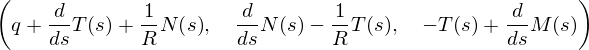

In [5]:
deqn1=T(s).diff(s)+q+N(s)/R
deqn2=N(s).diff(s)-T(s)/R
deqn3=M(s).diff(s)-T(s)
deqn1,deqn2,deqn3

Derivováním druhé rovnice podle $s$ a její dosazení do rovnice první se dostane obyčejná diferenciální rovnice druhého řádu pro normálovou složku $N(s)$,

\begin{equation}
  R\frac{\mathrm{d}^2N(s)}{\mathrm{d}s^2}+\frac{N(s)}{R}=-q(s).
\end{equation}

V *Python*u se to může provést následovně,

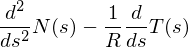

In [6]:
deqn2s=deqn2.diff(s)
deqn2s

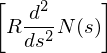

In [7]:
sol1=sp.solve(deqn2s,T(s).diff(s))
sol1

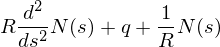

In [8]:
deqn10=deqn1.subs(T(s).diff(s),sol1[0])
deqn10

Jde o lineární diferenciání rovnici druhého řádu. Za předpokladu, že $q=0$ se řešení předchozí rovnice předpokládá ve tvaru

\begin{equation}
  N(s)=\mathrm{e}^{ps},
\end{equation}

kde $p$ je obecně komplexní číslo. Dosazení $N(s)=\mathrm{e}^{ps}$ do výše uvedené diferenciální rovnice se v *Python*u provede následovně,

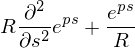

In [9]:
deqn11=deqn10.subs({N(s):sp.exp(p*s),q:0})
deqn11

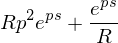

In [10]:
deqn12=deqn11.doit()
deqn12

Po úpravách se dostane tzv. *charakteristická* rovnice, ze které se vyjádří $p$.

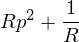

In [11]:
eqn3=sp.collect(deqn12,sp.exp(p*s),evaluate=False)
eqn4=eqn3[sp.exp(p*s)]
eqn4

Řešení této kvadratické rovnice vzhledem k neznámé $p$ je,

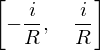

In [12]:
sol3=sp.solve(eqn4,p)
sol3

Protože platí vztah,

\begin{equation}
  \mathrm{e}^{is}=\cos\left(s\right)+i\sin\left(s\right)
\end{equation}

může se řešení $N(s)$ případě ryze komplexního parametru $p=\pm i\left|p\right|$ psát v následujícím tvaru,

\begin{equation}
  N\left(\theta\right)=C_1\left[\cos(\theta)+i\sin\left(\theta\right)\right]+C_2\left[\cos\left(\theta\right)-i\sin\left(\theta\right)\right]
\end{equation}

kde

\begin{equation}
  \theta=\frac{s}{R}
\end{equation}

je úhel, který svírá bod $s$ s vodorovnou osou měřený ve smyslu hodinových ručiček,

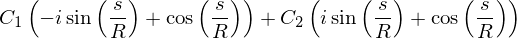

In [13]:
N0=C_1*sp.expand_complex(sp.exp(sol3[0]*s))+C_2*sp.expand_complex(sp.exp(sol3[1]*s))
N0

Předchozí rovnici lze získat přímo pomocí příkazu *dsolve* (viz. pruhybová čára).

*Úkol*: Vygenerujte vztah pro $N\left(s\right)$ pomocí příkazu *dsolve*.

Neznámé konstanty $C_1$ a $C_2$ jsou obecně komplexní a určí se z okrajových podmínek, které pro $s=R\theta$ mají tvar,

\begin{eqnarray}
  N(s)&=&\frac{F}{2}\quad\mathrm{pro}\quad s=0,\\
  N(s)&=&F_A\quad\mathrm{pro}\quad s=R\frac{\pi}{2}.
\end{eqnarray}

Výše napsané okrajové podmínky se v *Python*u mohou zapsat následovně,

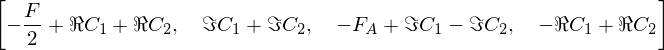

In [14]:
bc=[sp.re(N0.subs(s,0))-F/2,sp.im(N0.subs(s,0)),sp.re(N0.subs(s,R*sp.pi/2)-F_A),sp.im(N0.subs(s,R*sp.pi/2)-F_A)]
bc

**Poznámka:** Je nutné si uvědomit, že knihovna *Sympy* předpokládá, že se vždy každá rovnice automaticky rovná nule. Je to geniální syntaktická zkratka, která nemá potřebu zavádět spěciální znaky pro rovnost v rovnicích a pro přiřazení proměnné, jak je tomu u jiných *CAS* systémů. Z tohoto důvodu se v předchozím výrazu (*list*u-seznamu) nevysytuje zádné rovnítko a "rovno nule" se jednoduše vynechává. Symboly $\Re$ a $\Im$ značí reálnou a imaginární část neznámých konstant $C_1$ a $C_2$.

Řešení předchozí soutavy algebraických rovnic sestavených z okrajových podmínek je,

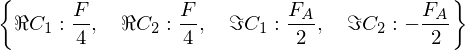

In [15]:
sol4=sp.solve(bc,[sp.re(C_1),sp.re(C_2),sp.im(C_1),sp.im(C_2)])
sol4

a jeho dosazením do $N(s)$ se dostane jeho výsledné řešení,

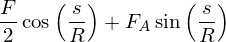

In [16]:
N1=N0.subs(C_1,sol4[sp.re(C_1)]+sp.I*sol4[sp.im(C_1)])
N2=N1.subs(C_2,sol4[sp.re(C_2)]+sp.I*sol4[sp.im(C_2)])
N=N2.simplify()
N

Výsledné řešení pro $T(s)$ se dostane na základě vztahu,

$$
  T\left(s\right)=R\frac{\mathrm{d}N\left(s\right)}{\mathrm{d}s},
$$

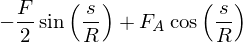

In [17]:
T1=R*N.diff(s)
T=T1.simplify()
T

Pro moment platí $M(s)$

$$
  M\left(s\right)=\int T\left(s\right)\mathrm{d}s+C_3,
$$

kde se integrační konstanta $C_3$ vyjádří z okrajové podmínky,

\begin{equation}
  M(s)=-M_A.\quad\mathrm{pro}\quad s=0.
\end{equation}

Toto se v *Python*u provede následovně,

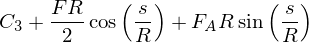

In [18]:
M1=sp.integrate(T,s)+C_3
M1

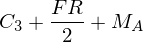

In [19]:
bc=M1.subs(s,0)+M_A
bc

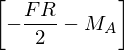

In [20]:
sol5=sp.solve(bc,C_3)
sol5

Výsledné řešení pro $M(s)$ má ve finále tvar,

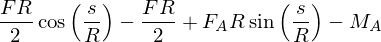

In [21]:
M=M1.subs(C_3,sol5[0])
M

Celkem všechny vnitřní výsledné účinky zakřiveného prutu v závislosti na úhlu $\theta$, kde $s=R\theta$,

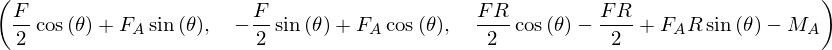

In [22]:
Nt=N.subs(s,R*theta)
Tt=T.subs(s,R*theta)
Mt=M.subs(s,R*theta)
Nt,Tt,Mt

Vnitřní výsledné účinky přímého prutu,

In [23]:
N2=F_A
N2

Odstranění statické neurčitosti vyřešením deformačních podmínek,

\begin{equation}
   \varphi_A^I=\frac{\partial W^I}{\partial M_A}=\int_0^{\pi/2}\frac{M^I(\theta)}{EJ}\frac{\partial M^I(\theta)}{\partial M_A}R\mathrm{d}\theta=0
\end{equation}

a

\begin{equation}
  w_A^I=\frac{\partial W^I}{\partial F_A}=\int_0^{\pi/2}\frac{M^I(\theta)}{EJ}\frac{\partial M^I(\theta)}{\partial F_A}R\mathrm{d}\theta=-\frac{2N^{II}R}{ES}\frac{\partial N^{II}}{\partial F_A}=-\frac{\partial W^{II}}{\partial F_A}=u_A^{II}.
\end{equation}

Derivace $M^I$ podle $M_A$ a $F_A$,

In [24]:
dMtdM_A=Mt.diff(M_A)
dMtdF_A=Mt.diff(F_A)
dMtdM_A,dMtdF_A

Rovnice deformačních podmínek pro neznámé $F_A$ a $M_A$,

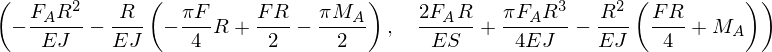

In [25]:
eqn1=sp.integrate(Mt/E/J*dMtdM_A*R,(theta,0,sp.pi/2))
eqn2=sp.integrate(Mt/E/J*dMtdF_A*R,(theta,0,sp.pi/2))+2*F_A/E/S*R
eqn1,eqn2

a jejich řešení,

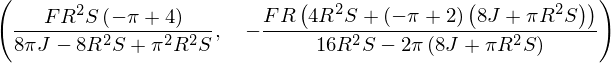

In [26]:
eqn1_=sp.collect(sp.expand(eqn1),[F_A,M_A])
eqn2_=sp.collect(sp.expand(eqn2),[F_A,M_A])
sol6=sp.linsolve([eqn1_,eqn2_],[F_A,M_A])
F_A_,M_A_=next(iter(sol6))
F_A_,M_A_

Namáhání prutů se vyšetří na konkrétním zadání. Zadané hodnoty jsou v [mm], [N] a [MPa],

In [27]:
b_,h_=15.0,50.0
J_=1/12.0*b_*h_**3
S_=b_*h_
F_=10000.0
r_=350
E_=2.1e5
sigma_k_=350

Velikost a smysl síly $F_A$ a momentu $M_A$,

In [28]:
F_A_ev=float(F_A_.subs({R:r_,S:S_,J:J_,F:F_}))
F_A_ev

In [29]:
M_A_ev=float(M_A_.subs({R:r_,S:S_,J:J_,F:F_}))
M_A_ev

Vyjádření normálové složky $N\left(\theta\right)$ vnitřních účinků zakřiveného prutu,

In [30]:
Ntf=Nt.subs({M_A:M_A_ev,F_A:F_A_ev,F:F_})
Ntf

Vyjádření $T\left(\theta\right)$ vnitřních účinků zakřiveného prutu,

In [31]:
Ttf=Tt.subs({M_A:M_A_ev,F_A:F_A_ev,F:F_})
Ttf

Vyjádření $M\left(\theta\right)$ vnitřních účinků zakřiveného prutu,

In [32]:
Mtf=Mt.subs({M_A:M_A_ev,F_A:F_A_ev,F:F_,R:r_})
Mtf

Pro vykreslení vnitřních účinků se tyto vyjádří v bodech rovnoměrně rozložených podél střednice, 

In [33]:
bodu=20
meritko=5.

thetaI=np.linspace(0,np.pi/2,bodu)

strednice_x=[-np.cos(ii) for ii in thetaI]
strednice_y=[np.sin(ii) for ii in thetaI]

grid_x=[[0,0],[0,-(1+1/(meritko-1))*np.cos(np.pi/4.)],[0,(-1-1/(meritko-1))]]
grid_y=[[0,(1+1/(meritko-1))],[0,(1+1/(meritko-1))*np.sin(np.pi/4.)],[0,0]]

N_plot=[float(Ntf.subs(theta,ii)) for ii in thetaI]
N_plot_max=abs(max(N_plot))
N_plot_x=[(N_plot[ii]/meritko/N_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
N_plot_y=[(N_plot[ii]/meritko/N_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

T_plot=[float(Ttf.subs(theta,ii)) for ii in thetaI]
T_plot_max=abs(max(T_plot))
T_plot_x=[(T_plot[ii]/meritko/T_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
T_plot_y=[(T_plot[ii]/meritko/T_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

M_plot=[float(Mtf.subs(theta,ii)) for ii in thetaI]
M_plot_max=abs(max(M_plot))
M_plot_x=[(M_plot[ii]/meritko/M_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
M_plot_y=[(M_plot[ii]/meritko/M_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

Vykreslení normálové složky $N\left(\theta\right)$ podél střednice zakřiveného prutu,

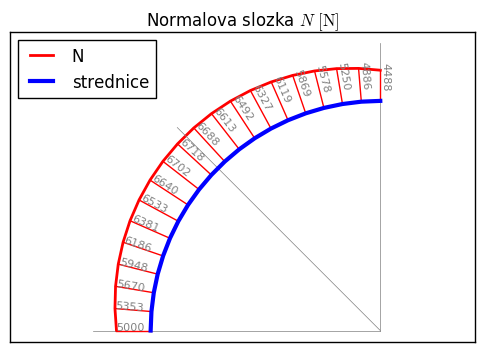

In [34]:
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Normalova slozka $N$ '+r'$[\mathrm{N}]$')
ax.plot(N_plot_x,N_plot_y,color="red",label='N',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],N_plot_x[ii]]
  pointy=[strednice_y[ii],N_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(N_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

Vykreslení posouvající složky $T\left(\theta\right)$ podél střednice zakřiveného prutu,

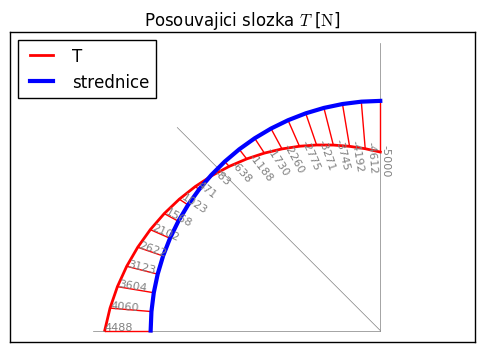

In [35]:
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Posouvajici slozka $T$ '+r"[$\mathrm{N}$]")
ax.plot(T_plot_x,T_plot_y,color="red",label='T',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],T_plot_x[ii]]
  pointy=[strednice_y[ii],T_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(T_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

Vykreslení momentové složky $M\left(\theta\right)$ podél střednice zakřiveného prutu,

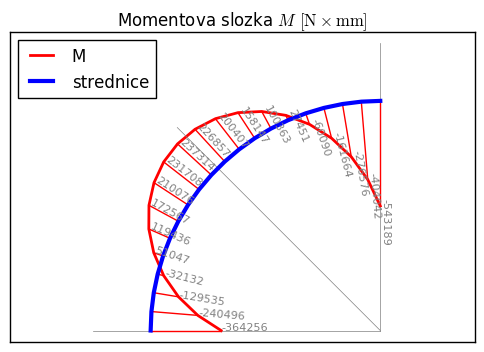

In [36]:
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Momentova slozka $M$ '+r'$[\mathrm{N}\times\mathrm{mm}]$')
ax.plot(M_plot_x,M_plot_y,color="red",label='M',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],M_plot_x[ii]]
  pointy=[strednice_y[ii],M_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(M_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

#### Kontrola k meznímu stavu pružnosti zakřiveného rámu

Z grafu pro $M(\theta)$ je patrné, že nebezpečný průřez je v místě působení síly $F$, tedy pro $\theta=\pi/2$. Dochází zde však ke kombinaci napětí. Proto v příčném průřezu nejdříve vyjáříme průběhy napětí podle vztahů,

\begin{eqnarray}
  &&\sigma_x=\frac{N}{S}, \\
  &&\tau_{xz}=\frac{6T}{bh^3}\left(\frac{h^2}{4}-z^2\right)\quad\Leftarrow\quad\mathrm{tzv.}\,\mathrm{Žuravského}\,\mathrm{vztah}, \\
  &&\sigma_x=\frac{M}{J_y}z.
\end{eqnarray}

Vykreslení rozložení normálového napětí $\sigma_x^N\left(y,z\right)$ od složky $N\left(\theta\right)$ v příčném průřezu (šedý obdélník odpovídá nulovým hodnotám napětí $\sigma_x^N\left(y,z\right)$),

In [38]:
x,y,z=[],[],[]
for ii in np.linspace(-7.5,7.5,15): 
  for jj in np.linspace(-25,25,50):
    x.append(ii)
    y.append(jj)
    z.append(float(Ntf.subs(theta,np.pi/2.))/b_/h_)

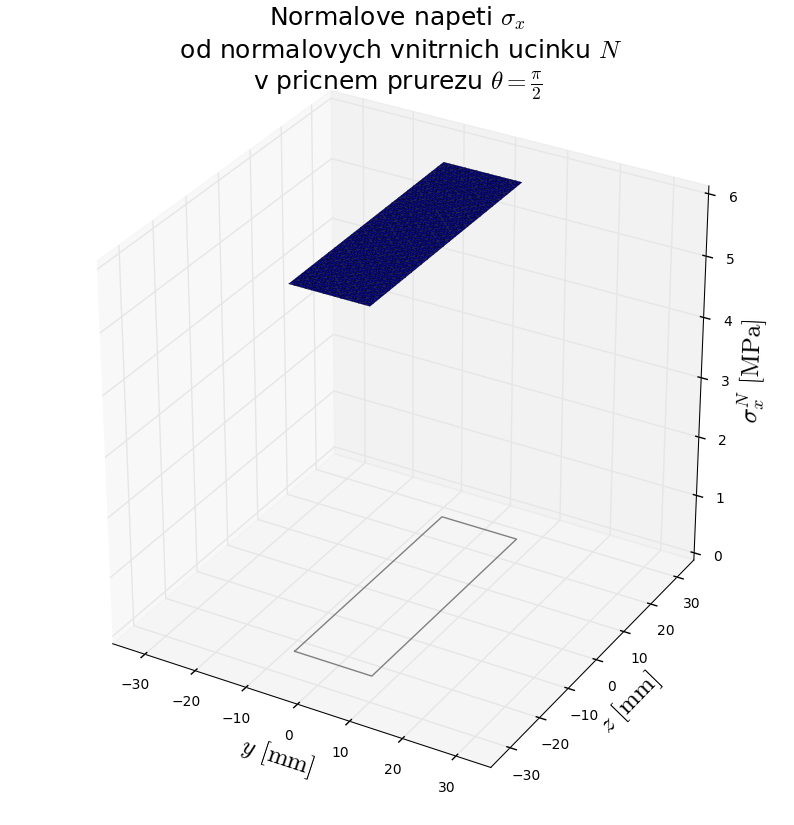

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-35,35)
ax.set_ylim3d(-35,35)
#ax.set_zlim3d(-150,150)
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel('$\sigma^N_x$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Normalove napeti $\sigma_x$\n od normalovych vnitrnich ucinku '+r'$N$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{2}$').set_fontsize(18)
ax.plot([-b_/2,-b_/2,b_/2,b_/2,-b_/2],[-h_/2,h_/2,h_/2,-h_/2,-h_/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

Vykreslení rozložení smykového napětí $\tau_{xz}^T\left(y,z\right)$ od posouvající síly v příčném průřezu (šedý obdélník odpovídá nulovým hodnotám napětí $\tau_{xz}^T\left(y,z\right)$),

In [40]:
x,y,z=[],[],[]
for ii in np.linspace(-7.5,7.5,15): 
  for jj in np.linspace(-25,25,50):
    x.append(ii)
    y.append(jj)
    z.append(6*float(Ttf.subs(theta,np.pi/2.))/b_/h_**3*(h_**2/4-jj**2)) #tzv. Zuravskeho vzorec pro obdelnik

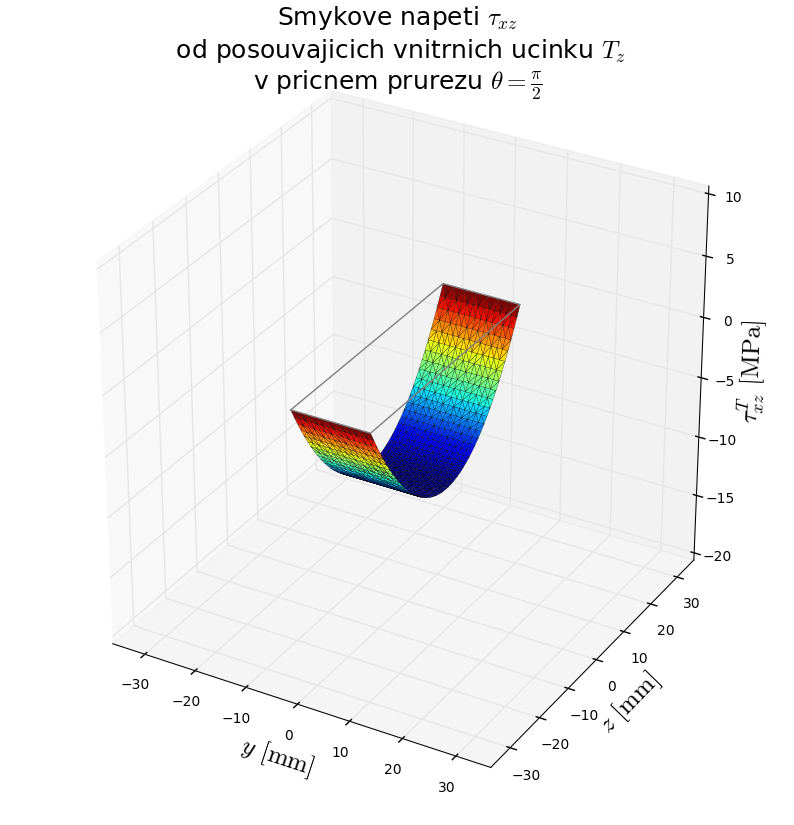

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-35,35)
ax.set_ylim3d(-35,35)
ax.set_zlim3d(-20,10)
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel(r'$\tau^T_{xz}$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Smykove napeti '+r'$\tau_{xz}$'+'\n od posouvajicich vnitrnich ucinku '+r'$T_z$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{ 2}$').set_fontsize(18)
ax.plot([-b_/2,-b_/2,b_/2,b_/2,-b_/2],[-h_/2,h_/2,h_/2,-h_/2,-h_/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

Vykreslení rozložení normálového napětí $\sigma_x^M\left(y,z\right)$ od momentové složky $M\left(\theta\right)$ výsledných vnitřních účinků v příčném průřezu (šedý obdélník odpovídá nulovým hodnotám napětí $\sigma_x^M\left(y,z\right)$),

In [42]:
x,y,z=[],[],[]
for ii in np.linspace(-7.5,7.5,15): 
  for jj in np.linspace(-25,25,50):
    x.append(ii)
    y.append(jj)
    z.append(-float(Mtf.subs(theta,np.pi/2.))/J_*jj) #z duvodu lepsiho zobrazeni je u momentu znamenko minus

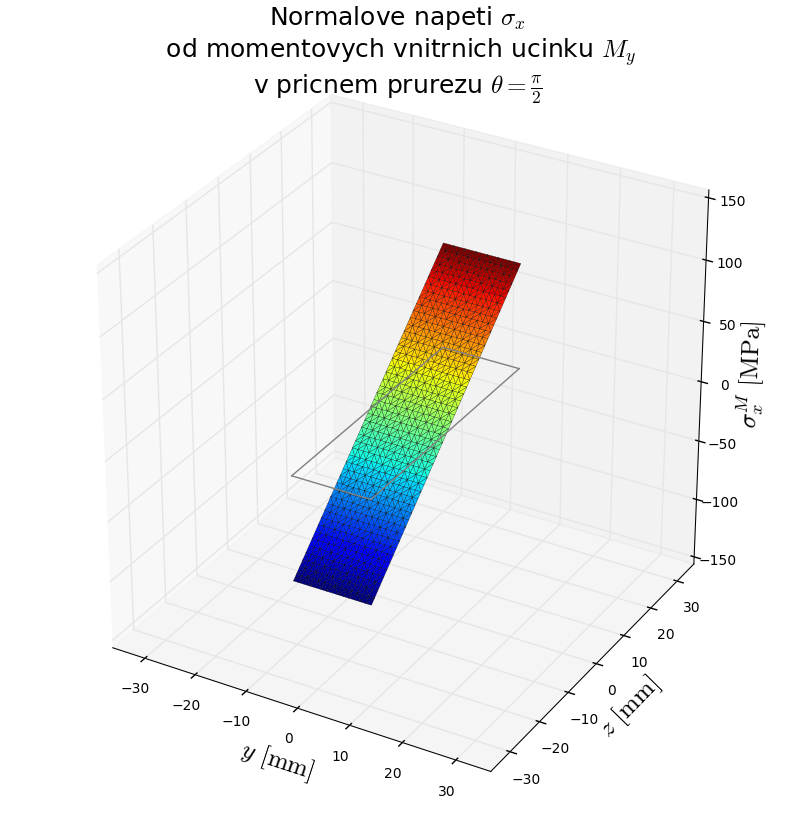

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-35,35)
ax.set_ylim3d(-35,35)
ax.set_zlim3d(-150,150)
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel('$\sigma^M_x$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Normalove napeti $\sigma_x$\n od momentovych vnitrnich ucinku '+r'$M_y$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{ 2}$').set_fontsize(18)
ax.plot([-b_/2,-b_/2,b_/2],[-h_/2,h_/2,h_/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)
ax.plot([-b_/2,b_/2,b_/2],[-h_/2,-h_/2,h_/2],color='grey')

 V krajních vláknech příčného průřezu, tj. pro $z=-\frac{h}{2}$, je normálové napětí superozicí napětí od výsledných vnitřních účinků $N$ a $M$,

\begin{equation}
  \sigma_{x,max}=\frac{\left|N\left(\frac{\pi}{2}\right)\right|}{S}+\frac{\left|M\left(\frac{\pi}{2}\right)\right|}{W_o},
\end{equation}

kde

\begin{equation}
  S=bh\quad a\quad W_o=\frac{1}{6}bh^2.
\end{equation}

Maximální hodnota napětí $\sigma_x$ v příčném průřezu má hodnotu,

In [50]:
sigma_max=float(abs(Ntf.subs(theta,np.pi/2.)))/(b_*h_)+float(abs(Mtf.subs(theta,np.pi/2.)))*6/b_/h_**2
sigma_max

Na střednici prutu studovaného příčného průřezu, tj. pro $z=0$, je superozice normálového napětí od složky vnitřních účinků $N$ a smykového napětí od složky vnitřních účinků $T$. Redukované napětí se vyjádří podle *Trescovy* teorie,

\begin{equation}
  \sigma_{red}=\sqrt{\left(\sigma^N_x\right)^2+4\left(\tau^T_{xz}\right)^2}=\sqrt{\left(\frac{N\left(\frac{\pi}{2}\right)}{S}\right)^2+4\left(\frac{3T\left(\frac{\pi}{2}\right)}{2S}\right)^2}.
\end{equation}

Redukované napětí $\sigma_{red}$ má velikost,

In [52]:
sigma_red=np.sqrt((float(Ntf.subs(theta,np.pi/2.))/b_/h_)**2+4*(3*float(Ttf.subs(theta,np.pi/2.))/2/b_/h_)**2)
sigma_red

Bezpečnost vzhledem k meznímu stavu pružosti zakřiveného prutu,

\begin{equation}
  k=\mathrm{min}\left\{ \frac{\sigma_k}{\sigma_{max}},\frac{\sigma_k}{\sigma_{red}}\right\}.
\end{equation}

In [54]:
k1=min([sigma_k_/sigma_max,sigma_k_/sigma_red])
k1

#### Kontrola k meznímu stavu vzpěrné stability přímého prutu

Vzhledem k tomu, že daný příčný průřez bez problémů snese kombinaci tahového a smykového napětí v případě zakřiveného prutu namáhaného ohybem, nemá smysl kontorolovat stejný příčný průřez na jeho schopnost snést prostý tah a tlak. Proto přímý prut namáhaný tlakem by stačilo kontrolovat jen vzhledem k míře jeho schopnosti odolat svému borcení. Přesto se dále budeme držet metodiky a rozhodnutí o správném způsobu kontroly necháme na ní. K tomu je nutné si zavést následující geometrické charakteristiky a posoudit způsob uložení konců prutu,

Geometrické charakteristiky,

\begin{eqnarray}
  &&J_{min}=\frac{1}{12}b^3h, \\
  &&i=\sqrt{\frac{J_{min}}{S}}, \\
  &&\lambda=\frac{R}{i}
\end{eqnarray}

a charakter uložení (jeden konec prutu je volný, druhý je vetknutý),

\begin{equation}
  \alpha=\frac{\pi}{2}.
\end{equation}

Konkrétně a *Python*ovsky,

In [55]:
J_min=1./12.*b_**3*h_
i=np.sqrt(J_min/b_/h_)
lambda_=r_/i
alpha=np.pi/2
J_min,i,lambda_,alpha

Mezní štíhlost,

\begin{equation}
  \lambda_k=\sqrt{\frac{\alpha^2E}{\sigma_k}}.
\end{equation}

In [57]:
lambda_k=np.sqrt(alpha**2*E_/sigma_k_)
lambda_k

Bezpečnost přímého prutu se stanoví podle relace mezi $\lambda$ a $\lambda_k$,

+ $\lambda<\lambda_k$ $\Rightarrow$  $k_2=\frac{\sigma_k}{\sigma_2}$,
+ $\lambda\geq\lambda_k$ $\Rightarrow$ $k_2=\frac{F_v}{2F_A}$, kde $F_v=\frac{\alpha^2EJ_{min}}{R^2}$.

In [60]:
if lambda_<lambda_k:
  print "kontrola k meznímu stavu pružnosti v tlaku"
  k2=sigma_k_/2/FA_
elif lambda_>=lambda_k:
  print "kontrola k meznímu stavu vzpěrné stability"
  Fv=alpha**2*E_*J_min/r_**2
  k2=Fv/2/F_A_ev
k2

kontrola k meznímu stavu vzpěrné stability


Celková míra bezpečnosti soustavy prutů je,

$$
  k=\mathrm{min}\left\{k_1,k_2\right\},
$$

In [62]:
k=np.min([k1,k2])
k

To není marný.